In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [7]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules for dataset, splitting, model and evaluation
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [8]:
# Load the California Housing Dataset
data = fetch_california_housing()

# Convert the dataset to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target  # Add target column to the DataFrame

# Show first few rows
print("Showing first 5 rows of the dataset:")
print(df.head())


Showing first 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [9]:
# Check for missing values
print("\nChecking for missing values in dataset:")
print(df.isnull().sum())



Checking for missing values in dataset:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64



Plotting heatmap to see how features are related...


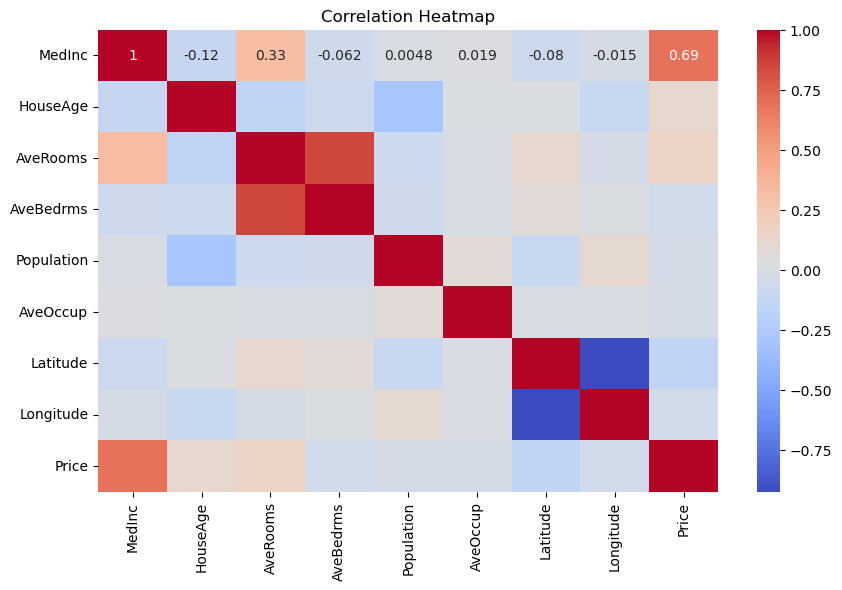

In [10]:
# Correlation heatmap
print("\nPlotting heatmap to see how features are related...")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [16]:
# Prepare data for training
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=143)


In [12]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred)
print(f"\nR2 Score of the model: {r2:.4f}")



R2 Score of the model: 0.5758


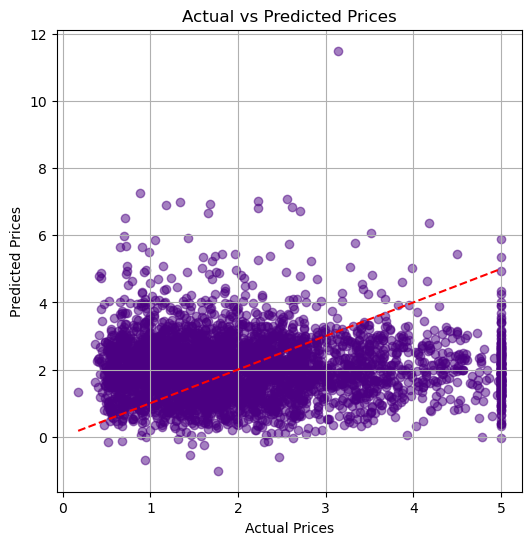

In [28]:
# Plotting actual vs predicted prices
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, color='indigo', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.grid(True)
plt.show()


In [15]:
# Taking input from the user to predict price
print("\nLet's try predicting the house price using your own input!")

try:
    MedInc = float(input("Enter Median Income (e.g. 6.0): "))
    HouseAge = float(input("Enter House Age (e.g. 30): "))
    AveRooms = float(input("Enter Average Number of Rooms (e.g. 5.0): "))
    AveBedrms = float(input("Enter Average Number of Bedrooms (e.g. 1.0): "))
    Population = float(input("Enter Population in the area (e.g. 1000): "))
    AveOccup = float(input("Enter Average Occupancy (e.g. 3.0): "))
    Latitude = float(input("Enter Latitude (e.g. 34.0): "))
    Longitude = float(input("Enter Longitude (e.g. -118.0): "))

    # Create a DataFrame from user input
    new_data = pd.DataFrame([{
        'MedInc': MedInc,
        'HouseAge': HouseAge,
        'AveRooms': AveRooms,
        'AveBedrms': AveBedrms,
        'Population': Population,
        'AveOccup': AveOccup,
        'Latitude': Latitude,
        'Longitude': Longitude
    }])

    # Make prediction
    prediction = model.predict(new_data)
    print(f"\nEstimated House Price: {prediction[0]:.2f} (in 100,000 USD)")

except Exception as e:
    print("Something went wrong! Make sure you entered numbers only.")
    print("Error details:", e)



Let's try predicting the house price using your own input!


Enter Median Income (e.g. 6.0):  5.6
Enter House Age (e.g. 30):  22
Enter Average Number of Rooms (e.g. 5.0):  4
Enter Average Number of Bedrooms (e.g. 1.0):  2
Enter Population in the area (e.g. 1000):  45000
Enter Average Occupancy (e.g. 3.0):  4
Enter Latitude (e.g. 34.0):  38
Enter Longitude (e.g. -118.0):  -122.667



Estimated House Price: 3.92 (in 100,000 USD)
